# Lista 2

## Kod

### Importowanie Bibliotek

In [ ]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from scipy.stats import t as tp

### Funkcje

Funkcja do tworzenia n elementowych ciągów losowych liczb z rozkładu równomiernego

In [2]:
def string_generator(n):
    result = []
    for i in range(n):
        result.append(random.uniform(-1,1))
    return result
    

Funkcja do obliczania dominanty

In [3]:
def dominanta(data):
    values, counts = np.unique(data, return_counts=True)
    max_count = np.max(counts)
    result = values[counts == max_count]
    if len(result) > 1:
        return "Brak dominanty"
    else:
        return result[0]

Funkcja do wyliczania statystyk

In [4]:
def statystyki(data):
    mean = data.mean()
    median = np.median(data)
    mode = dominanta(data)
    std = np.std(data)
    var = np.var(data)
    skew = stats.skew(data)
    kurtoza = stats.kurtosis(data,fisher=True)
    rozstep = abs(max(data) - min(data))
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    

    result = {
        'mean':mean,
        'median':median,
        'mode':mode,
        'rozstep':rozstep,
        'std':std,
        'var':var,
        'skosnosc':skew,
        'kurtoza':kurtoza,
        'kwartyl_25': Q1,
        'kwartyl_50': Q2,
        'kwartyl_75': Q3
    }
    return result

Funkcja do obliczania statystyki testowej t-studenta i wartości p

In [5]:
def t_value(n,std,mean,h_value):
    t = (mean - h_value)/(std/math.sqrt(n))
    p = 2 * tp.sf(abs(t), n-1)
    return t,p

Funkcja do tworzenia histogramów dla dwóch ciągów wraz z funkcją gęstości rozkładu równomiernego

In [6]:
def histogram(a,b):

    x_values = np.linspace(-1, 1, 1000)
    uniform_density = np.ones_like(x_values) * 0.5  

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].hist(a, bins=np.linspace(-1, 1, 9), density=True, color='skyblue', edgecolor='black')
    axes[0].plot(x_values, uniform_density, color='red', linestyle='--', label='Rozkład U(-1, 1)')
    axes[0].set_title(f'Histogram dla próby o długości {len(a)}')
    axes[0].set_xlabel('Wartości')
    axes[0].set_ylabel('Gęstość')
    axes[0].legend()

    axes[1].hist(b, bins=np.linspace(-1, 1, 9), alpha = 0.5,density=True, color='orange', edgecolor='black')
    axes[1].plot(x_values, uniform_density, color='red', linestyle='--', label='Rozkład U(-1, 1)')
    axes[1].set_title(f'Histogram dla próby o długości {len(b)}')
    axes[1].set_xlabel('Wartości')
    axes[1].set_ylabel('Gęstość')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


### Definiowanie ciągów a i b 

In [7]:
a = np.array(string_generator(15))

In [8]:
b = np.array(string_generator(120))

Rozkład równomierny : 

In [9]:
x_values = np.linspace(-1, 1, 100)

## Statystyki ciągów

### Statystyki ciągu a

In [10]:
statystyki(a)

{'mean': np.float64(-0.06340092341992369),
 'median': np.float64(-0.03974340146563837),
 'mode': 'Brak dominanty',
 'rozstep': np.float64(1.654284170832844),
 'std': np.float64(0.5490721676183499),
 'var': np.float64(0.30148024525311334),
 'skosnosc': np.float64(-0.06791129293177803),
 'kurtoza': np.float64(-1.3635318979420603),
 'kwartyl_25': np.float64(-0.6539642268346793),
 'kwartyl_50': np.float64(-0.03974340146563837),
 'kwartyl_75': np.float64(0.396362725400099)}

### Statystyki ciągu b

In [11]:
statystyki(b)

{'mean': np.float64(-0.006687343244388398),
 'median': np.float64(-0.06566349950834083),
 'mode': 'Brak dominanty',
 'rozstep': np.float64(1.9855197437008485),
 'std': np.float64(0.5594695216358302),
 'var': np.float64(0.3130061456394247),
 'skosnosc': np.float64(0.12728852900790955),
 'kurtoza': np.float64(-1.240564061267722),
 'kwartyl_25': np.float64(-0.5085365753284435),
 'kwartyl_50': np.float64(-0.06566349950834083),
 'kwartyl_75': np.float64(0.4962498113927776)}

### Statystyki rozkładu równomiernego

In [12]:
statystyki(x_values)

{'mean': np.float64(8.215650382226158e-17),
 'median': np.float64(5.551115123125783e-17),
 'mode': 'Brak dominanty',
 'rozstep': np.float64(2.0),
 'std': np.float64(0.5831529302570125),
 'var': np.float64(0.34006734006734013),
 'skosnosc': np.float64(-1.8474673971003794e-16),
 'kurtoza': np.float64(-1.2002400240024005),
 'kwartyl_25': np.float64(-0.5),
 'kwartyl_50': np.float64(5.551115123125783e-17),
 'kwartyl_75': np.float64(0.5000000000000001)}

## Histogramy

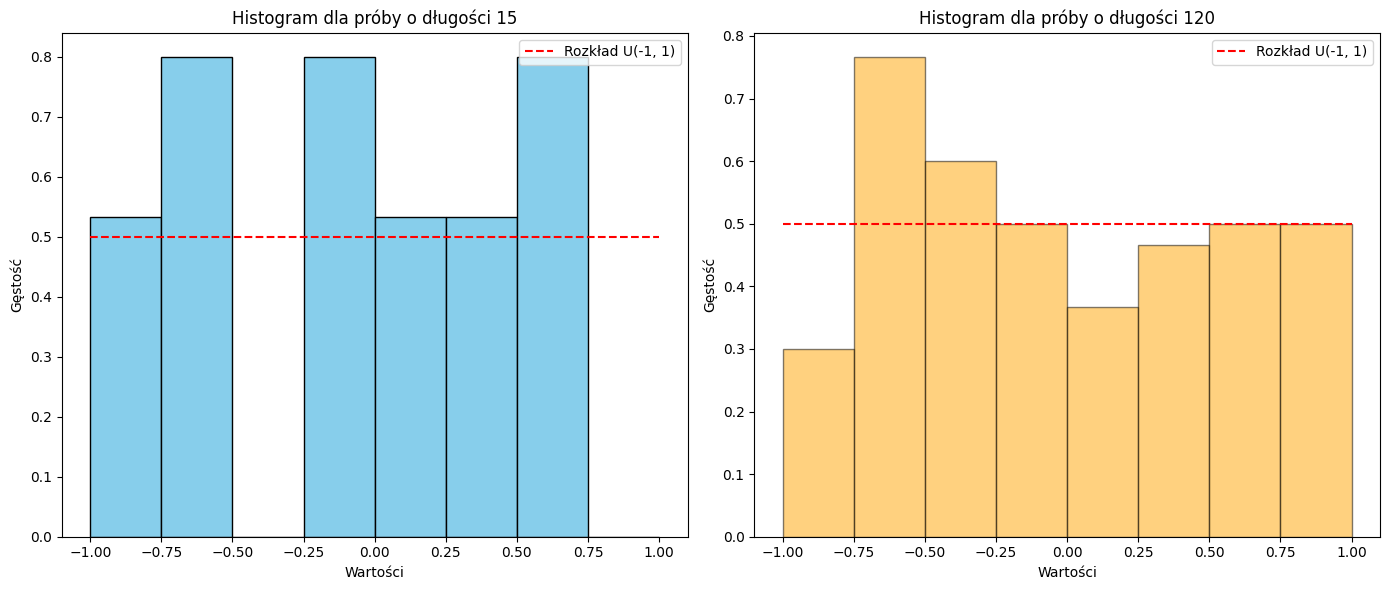

In [13]:
histogram(a,b)

## Testy statystyczne

Hipoteza zerowa H0 - Średnia z próby jest równa 0  
Hipoteza alternatywna HA - Średnia z próby różni się od 0

Poziom istotności alfa = 0.05

Wynik statystyki testowej (liczba po lewej) rozkładu t-studenta dla ciągu 15 elementowego i wartości p (liczna po prawej)

In [14]:
aw = t_value(15,statystyki(a)['std'],statystyki(a)['mean'],0)
t_value(15,statystyki(a)['std'],statystyki(a)['mean'],0)

(np.float64(-0.4472102849514931), np.float64(0.6615642123145833))

Wynik statystyki testowej (liczba po lewej) rozkładu t-studenta dla ciągu 120 elementowego i wartości p (liczba po prawej)

In [15]:
bw = t_value(120,statystyki(b)['std'],statystyki(b)['mean'],0)
t_value(120,statystyki(b)['std'],statystyki(b)['mean'],0)

(np.float64(-0.13093863394101038), np.float64(0.8960449550735169))

## Wnioski

### Statystyka opisowa

- Średnia 

    Średnia dla rozkładu równomiernego powinna wynosić 0 w idealnym przypadku.  
    Dla stu elementowego rozkładu równomiernego wynosi ona 8,2 * 10^-17 co jest bardzo blisko 0. 
    W próbie 15 elementowej wartości są bardziej przesunięte w stronę wartości ujemnych niż w próbir 120 elementowej.  
    Może to być spowodowane małą liczebnością próby, pomimo tego obydwie te wartości są bliskie 0.

- Mediana

    Mediana rozkladu równomiernego powinna wynosić 0 w idealnym przypadku.
    W próbie 15 elementowej mediana jest bardziej odchylona niż w próbie 120 elementowej,  
    tutaj też powodem tego jest mniejsza liczebność próby. Wartości też są blisko 0.  

- Moda

    Rozkład równomierny nie posiada dominanty, dla prób 15 i 120 elementowych równiez jej nie ma

- Rozstęp

    Rozstęp dla rozkładu równomiernego powinien wynosić 2, co sprawdza się dla 100 elementowego rozkładu.
    Próba 15 i szczególnie 120 elementowa posiadają wartości zbliżone do wartości 2.0

- Odchylenie standardowe

    STD dla rozkładu równomiernego teoretycznie wynosi około 0.577.    
    Można zauważyć, że std dla próby 15 i 120 elementowej znajdują się blisko tej liczby

- Wariancja

    Wariancja dla rozkładu równomiernego powinna wynosić 0.3333   
    Obie próby maja zbliżone wartości do tej liczby 

- Skośność

    Skośność w rozkładzie równomiernym powinna wynosić 0,  
    dla obydwu prób można zauważyć wartośći zbliżone do 0

- Kurtoza 

    Powinna wynosić -1.2 dla rozkładu równomiernego, 
    również widać podobne wartości dla prób 15 i 120 elementowych

- Kwartyle

    Dla rozkładu równomiernego kwartyle powinny wynosić: Q1 -0.5, Q2 0, Q3 0.5
    Dla próby 15 elementowej wynoszą: Q1 −0.5727, Q2 −0.1091, Q3 0.4223
    Dla próby 120 elementowej wynoszą: Q1 −0.4758, Q2 0.0076, Q3 0.3921
    Wartości nieznacznie się różnią 

### Testy statystyczne

In [16]:
if aw[1] < 0.05:
    print("Odrzucamy H0 i przyjmujemy alternatywną")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0")

Nie ma wystarczających dowodów aby odrzucić H0


In [17]:
if bw[1] < 0.05:
    print("Odrzucamy H0 i przyjmujemy alternatywną")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0")

Nie ma wystarczających dowodów aby odrzucić H0


Test t-Studenta nie odrzuca hipotezy zerowej, czyli nie ma dowodów na odrzucenie hipotezy, że średnia dla prób 15 i 120 elementowych jest równa 0  
na przyjętym poziomie istotności alfa = 0.05

### Histogramy

Można zauważyć, że histogram dla próby 15 elementowej pomimo odchyleń, które są spowodowane małą licznością próby,  
w pewnym stopniu dopasowuje się do kształtu funkcji gęstości rozkładu równomiernego.  
Jest to bardziej widoczne dla próby 120 elementowej, gdzie odchylenia są mniejsze z powodu większego rozmiaru próby  
i histogram jest bardziej dopasowany do kształtu funkcji gęstości rozkładu równomiernego. 

### Wnioski Końcowe

Można zauważyć, że wyniki statystyki opisowej dla dwóch ciągów 15 i 120 elementowych są zbliżone, a czasami nieznacznie różne do   
wyników statystyki opisowej dla wygenerowanego rozkładu równomiernego 100 elementowego oraz teoretycznych wartości dla rozkładu równomiernego.   
Wyniki testów nie wykluczają mozliwości, że średnia ciągów 15 i 120 elementowych jest różna od 0.  
Histogramy prób 15 i 120 elementowych są w pewnym stopniu dopasowane do wykresu funkcji gęstości rozkładu równomiernego.  

